# Electricity Price Prediction with Machine Learning

<https://thecleverprogrammer.com/2021/11/15/electricity-price-prediction-with-machine-learning/>

The price of electricity depends on many factors. Predicting the price of electricity helps many businesses understand how much electricity they have to pay each year. The Electricity Price Prediction task is based on a case study where you need to predict the daily price of electricity based on the daily consumption of heavy machinery used by businesses.

## Electricity Price Prediction (Case Study)

Suppose that your business relies on computing services where the power consumed by your machines varies throughout the day. You do not know the actual cost of the electricity consumed by the machines throughout the day, but the organization has provided you with historical data of the price of the electricity consumed by the machines.

## Electricity Price Prediction using Python

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/electricity.csv")
df.tail()

C:\Users\Huang\AppData\Local\Temp\ipykernel_31628\613537240.py:1: DtypeWarning: Columns (9,10,11,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/electricity.csv")


DateTime         Holiday  HolidayFlag  DayOfWeek  WeekOfYear  \
38009  31/12/2013 21:30  New Year's Eve            1          1           1   
38010  31/12/2013 22:00  New Year's Eve            1          1           1   
38011  31/12/2013 22:30  New Year's Eve            1          1           1   
38012  31/12/2013 23:00  New Year's Eve            1          1           1   
38013  31/12/2013 23:30  New Year's Eve            1          1           1   

       Day  Month  Year  PeriodOfDay ForecastWindProduction SystemLoadEA  \
38009   31     12  2013           43                1179.14      3932.22   
38010   31     12  2013           44                1152.01      3821.44   
38011   31     12  2013           45                1123.67      3724.21   
38012   31     12  2013           46                1094.24      3638.16   
38013   31     12  2013           47                 1064.0      3624.25   

       SMPEA ORKTemperature ORKWindspeed CO2Intensity ActualWindProduction  \
38009  34.51           6.00        22.20       285.31                812.0   
38010  33.83           5.00        24.10       278.31                852.0   
38011  31.75           4.00        20.40       280.91                962.0   
38012  33.83           5.00        14.80       302.46                950.0   
38013  33.83           5.00        16.70       308.01               1020.0   

      SystemLoadEP2 SMPEP2  
38009       3692.95  42.45  
38010        3571.0  33.83  
38011       3460.29  31.75  
38012       3563.99   50.6  
38013       3517.08   34.9

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                38014 non-null  object
 1   Holiday                 38014 non-null  object
 2   HolidayFlag             38014 non-null  int64 
 3   DayOfWeek               38014 non-null  int64 
 4   WeekOfYear              38014 non-null  int64 
 5   Day                     38014 non-null  int64 
 6   Month                   38014 non-null  int64 
 7   Year                    38014 non-null  int64 
 8   PeriodOfDay             38014 non-null  int64 
 9   ForecastWindProduction  38014 non-null  object
 10  SystemLoadEA            38014 non-null  object
 11  SMPEA                   38014 non-null  object
 12  ORKTemperature          38014 non-null  object
 13  ORKWindspeed            38014 non-null  object
 14  CO2Intensity            38014 non-null  object
 15  Ac

In [5]:
df["ForecastWindProduction"] = pd.to_numeric(df["ForecastWindProduction"], errors= 'coerce')
df["SystemLoadEA"] = pd.to_numeric(df["SystemLoadEA"], errors= 'coerce')
df["SMPEA"] = pd.to_numeric(df["SMPEA"], errors= 'coerce')
df["ORKTemperature"] = pd.to_numeric(df["ORKTemperature"], errors= 'coerce')
df["ORKWindspeed"] = pd.to_numeric(df["ORKWindspeed"], errors= 'coerce')
df["CO2Intensity"] = pd.to_numeric(df["CO2Intensity"], errors= 'coerce')
df["ActualWindProduction"] = pd.to_numeric(df["ActualWindProduction"], errors= 'coerce')
df["SystemLoadEP2"] = pd.to_numeric(df["SystemLoadEP2"], errors= 'coerce')
df["SMPEP2"] = pd.to_numeric(df["SMPEP2"], errors= 'coerce')

In [6]:
df.shape

(38014, 18)

In [7]:
df.isnull().sum()

DateTime                    0
Holiday                     0
HolidayFlag                 0
DayOfWeek                   0
WeekOfYear                  0
Day                         0
Month                       0
Year                        0
PeriodOfDay                 0
ForecastWindProduction      5
SystemLoadEA                2
SMPEA                       2
ORKTemperature            295
ORKWindspeed              299
CO2Intensity                7
ActualWindProduction        5
SystemLoadEP2               2
SMPEP2                      2
dtype: int64

In [8]:
df.dropna(inplace=True)

In [12]:
df.corr().shape

(16, 16)

In [15]:
mask = np.triu(np.ones_like(df.corr()))
np.fill_diagonal(mask, 0)

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

C:\Users\Huang\.conda\envs\ADS2022\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


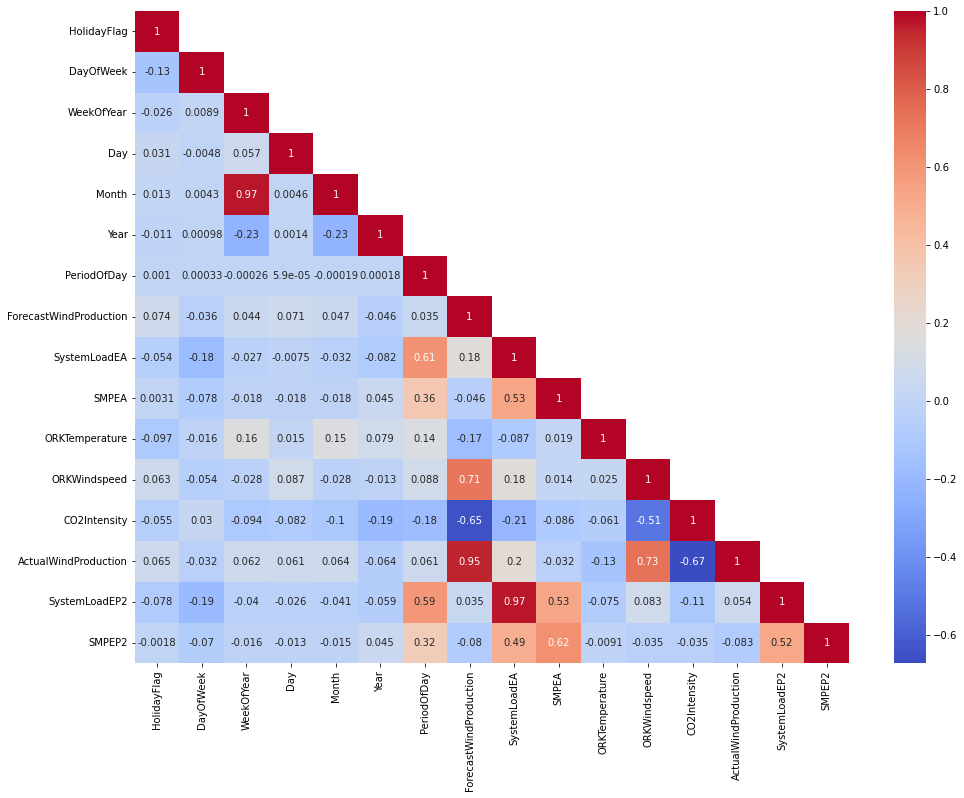

In [19]:
plt.figure(figsize=(16, 12))
sns.heatmap(data=df.corr(), cmap="coolwarm", annot=True, mask=mask)
plt.show()

## Electricity Price Prediction Model

Now let's move to the task of training an electrcity price prediction model. 

In [20]:
X = df[["Day", "Month", "ForecastWindProduction", "SystemLoadEA", 
          "SMPEA", "ORKTemperature", "ORKWindspeed", "CO2Intensity", 
          "ActualWindProduction", "SystemLoadEP2"]]
y = df[["SMPEP2"]]

In [21]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42)

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

C:\Users\Huang\AppData\Local\Temp\ipykernel_31628\3943944304.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestRegressor()

In [27]:
features = np.array([[10, 12, 54.10, 4241.05, 49.56, 9.0, 14.8, 491.32, 54.0, 4426.84]])
model.predict(features)

C:\Users\Huang\.conda\envs\ADS2022\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([65.9184])